<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Bazovye_ponyatiya_statistiki/DZ_Kondratev_STPY-48_Bazovye_ponyatiya_statistiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: `surgery?`, `Age`, `rectal temperature`, `pulse`, `respiratory rate`, `temperature of extremities`, `pain`, `outcome`.

### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.


### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

### 1. Загрузка данных

In [ ]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла "horse_data.csv" с указанием, что в файле нет заголовков столбцов (header=None)
# И указанием, что знак "?" следует интерпретировать как пропущенное значение
# (наличие пропущенных значений обозначено в данных именно знаком "?")
# Используя параметр usecols, указываем список индексов столбцов, которые нужно загрузить
# (в данном случае это столбцы с индексами 0, 1, 3, 4, 5, 6, 10 и 22)
# И задаем названия столбцов с помощью параметра names
data = pd.read_csv(
    'horse_data.csv',
    header=None,
    usecols=[0, 1, 3, 4, 5, 6, 10, 22],
    names=[
        'surgery?',
        'Age',
        'rectal temperature',
        'pulse',
        'respiratory rate',
        'temperature of extremities',
        'pain',
        'outcome'
    ],
    na_values=['?'])


In [ ]:
data
# Смотроим наш рабочий DataFrame

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


## Первичное изучение данных

### Анализ категориальных столбцов

Столбцы `surgery?`, `Age`, `temperature of extremities`, `pain`, `outcome` категориальные.

Для них найдем моды, выполним подсчет количества значений каждой категории, вычисление доли каждой категории, а также проверку соответствия уникальных значений категориям, описанным в описании данных.

In [ ]:
# Нахождение моды (наиболее часто встречающегося значения) для столбца 'surgery?'
surgery_mode = data['surgery?'].mode()[0]
print(f"Mode for 'surgery?': {surgery_mode}")

# Нахождение моды для столбца 'Age'
age_mode = data['Age'].mode()[0]
print(f"Mode for 'Age': {age_mode}")

# Нахождение моды для столбца 'temperature of extremities'
extremities_mode = data['temperature of extremities'].mode()[0]
print(f"Mode for 'temperature of extremities': {extremities_mode}")

# Нахождение моды для столбца 'pain'
pain_mode = data['pain'].mode()[0]
print(f"Mode for 'pain': {pain_mode}")

# Нахождение моды для столбца 'outcome'
outcome_mode = data['outcome'].mode()[0]
print(f"Mode for 'outcome': {outcome_mode}")

Mode for 'surgery?': 1.0
Mode for 'Age': 1
Mode for 'temperature of extremities': 3.0
Mode for 'pain': 3.0
Mode for 'outcome': 1.0


Анализ результатов позволяет сделать следующие выводы:
1. Большинство лошадей в базе данных прошли операцию (`surgery?` = 1.0), однако согласно описанию базы данных есть и группа лошадей, которые были лечены без операции (`surgery?` = 2.0).
2. Большинство лошадей в базе данных - взрослые особи (`Age` = 1), но согласно описанию базы данных также  есть и молодые лошади (< 6 месяцев) (`Age` = 2).
3. Большинство лошадей имеют прохладную температуру конечностей (`temperature of extremities` = 3.0), что может указывать на возможный шок. Однако согласно описанию базы данных также есть и лошади с нормальной (`temperature of extremities` = 1.0), теплой (`temperature of extremities` = 2.0) или холодной ('temperature of extremities' = 4.0) температурой конечностей.
4. Оценка болевого состояния лошадей (`pain`) может быть различной: от отсутствия боли и сознательности (значение 1.0), до непрерывной сильной боли (значение 5.0). При этом, чем более сильная боль, тем более вероятно, что требуется операция.
Полученное значение для столбца `pain` - мода равна 3.0, что указывает на то, что большинство лошадей имеют периодическую умеренную боль. Также важно отметить, что эта переменная не должна рассматриваться как упорядоченная или дискретная, так как каждый уровень боли не обязательно следует за предыдущим.
Более высокий уровень боли у лошадей может свидетельствовать о более серьёзных состояниях, которые могут требовать хирургического вмешательства. Это можно связать с тем, что сильная боль может быть следствием травмы или внутреннего заболевания, которые могут потребовать операции для устранения.
5. В итоге, большинство лошадей выживает (`outcome` = 1.0), но согласно описанию базы данных также есть и случаи смерти (`outcome` = 2.0) или эвтаназии (`outcome` = 3.0).

In [ ]:
# Проверка уникальных значений категорий и их соответствие описанию данных
surgery_categories = data['surgery?'].unique()
print(f"Unique categories for 'surgery?': {surgery_categories}")

age_categories = data['Age'].unique()
print(f"Unique categories for 'Age': {age_categories}")

extremities_categories = data['temperature of extremities'].unique()
print(f"Unique categories for 'temperature of extremities': {extremities_categories}")

pain_categories = data['pain'].unique()
print(f"Unique categories for 'pain': {pain_categories}")

outcome_categories = data['outcome'].unique()
print(f"Unique categories for 'outcome': {outcome_categories}")

Unique categories for 'surgery?': [ 2.  1. nan]
Unique categories for 'Age': [1 9]
Unique categories for 'temperature of extremities': [ 3. nan  1.  4.  2.]
Unique categories for 'pain': [ 5.  3.  2. nan  4.  1.]
Unique categories for 'outcome': [ 2.  3.  1. nan]


Анализ результатов позволяет сделать следующие выводы:

1. Для столбца `surgery?` описание данных указывает на категории 1.0 (операция) и 2.0 (без операции). Однако в данных присутствует также значение `nan`.
2. Для столбца `Age` описание данных указывает на категории 1 (взрослая лошадь) и 2 (молодая лошадь). В данных присутствует категория 9, которая не описывается в описании данных. Предположим, что это неправильное распознавание значения 2
3. Для столбца `temperature of extremities` описание данных указывает на категории 1.0 (нормальная температура), 2.0 (теплая температура), 3.0 (прохладная температура) и 4.0 (холодная температура). В данных также присутствует значение `nan`.
4. Для столбца `pain` описание данных указывает на категории 1.0 (отсутствие боли и сознательность), 2.0 (умеренная боли), 3.0 (периодическая умеренная боль), 4.0 (постоянная сильная боль) и 5.0 (непрерывная сильная боль). В данных также присутствует значение `nan`.
5. Для столбца `outcome` описание данных указывает на категории 1.0 (выживание), 2.0 (смерть) и 3.0 (эвтаназия). В данных также присутствует значение `nan`.

Выводы:
1. Для столбца `Age` значение 9 принимаем как значение 2
2. Необходимо решить, как обрабатывать значения `nan`.



In [ ]:
# Для столбца Age значение 9 принимаем как значение 2
data['Age'] = data['Age'].replace(9, 2)
age_categories = data['Age'].unique()
print(f"Unique categories for 'Age': {age_categories}")

Unique categories for 'Age': [1 2]


In [ ]:
# Подсчет количества значений каждой категории
category_counts_age = data["Age"].value_counts()
category_counts_temp = data["temperature of extremities"].value_counts()
category_counts_pain = data["pain"].value_counts()
category_counts_outcome = data["outcome"].value_counts()
category_counts_surgery = data["surgery?"].value_counts()

# Вывод результатов на печать
print("Результаты подсчета количества значений каждой категории:")
print("-" * 30)
print("Столбец 'Age':")
print(category_counts_age)
print("-" * 30)
print("Столбец 'temperature of extremities':")
print(category_counts_temp)
print("-" * 30)
print("Столбец 'pain':")
print(category_counts_pain)
print("-" * 30)
print("Столбец 'outcome':")
print(category_counts_outcome)
print("-" * 30)
print("Столбец 'surgery?':")
print(category_counts_surgery)

Результаты подсчета количества значений каждой категории:
------------------------------
Столбец 'Age':
1    276
2     24
Name: Age, dtype: int64
------------------------------
Столбец 'temperature of extremities':
3.0    109
1.0     78
2.0     30
4.0     27
Name: temperature of extremities, dtype: int64
------------------------------
Столбец 'pain':
3.0    67
2.0    59
5.0    42
4.0    39
1.0    38
Name: pain, dtype: int64
------------------------------
Столбец 'outcome':
1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64
------------------------------
Столбец 'surgery?':
1.0    180
2.0    119
Name: surgery?, dtype: int64


Анализ результатов позволяет сделать следующие выводы:

1. Для столбца `Age` мы видим 276 взрослых лошадей и 24 молодых лошадей. Это позволяет нам оценить пропорцию взрослых и молодых лошадей в нашей выборке.
2. В столбце `temperature of extremities` наиболее часто встречается категория 3.0 (прохладная температура) с 109 случаями, а затем следуют категории 1.0 (нормальная температура) - 78, 2.0 (теплая температура) - 30 и 4.0 (холодная температура) - 27. Это может указывать на распределение температуры конечностей лошадей в выборке.
3. В столбце `pain` наиболее часто встречается категория 3.0 (периодическая умеренная боль) с 67 случаями, затем следуют категории 2.0 (умеренная боль) - 59, 5.0 (непрерывная сильная боль) - 42, 4.0 (постоянная сильная боль) - 39 и 1.0 (отсутствие боли и сознательность) - 38. Это позволяет нам оценить распределение уровней боли у лошадей в выборке.
4. В столбце `outcome` наиболее часто встречается категория 1.0 (выживание) с 178 случаями, затем следуют категории 2.0 (смерть) - 77 и 3.0 (эвтаназия) - 44. Это позволяет нам оценить итоговый результат лечения у лошадей в выборке.
5. В столбце `surgery?` наиболее часто встречается категория 1.0 (операция) с 180 случаями, затем следует категория 2.0 (без операции) - 119. Это позволяет нам оценить соотношение проведенных операций и случаев без операции в выборке.

### Анализ непрерывных величин

Столбцы rectal temperature, pulse, respiratory rate являются непрерывными величинами. Для них найдем базовые статистики, применим межквартильный размах для поиска выбросов.

In [ ]:
# Нахождение базовых статистик для столбца 'rectal temperature'
rectal_temp_stats = data['rectal temperature'].describe()
print(f"Statistics for 'rectal temperature':\n{rectal_temp_stats}")

Statistics for 'rectal temperature':
count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64


Исходя из статистики для столбца `rectal temperature`, можно сделать следующий анализ распределения данных:

- В данных присутствует `240` наблюдений.
- Стандартное отклонение (`std`) равно `0.732289`, что указывает на небольшой разброс значений относительно среднего значения.

Исходя из этих данных, можно сказать, что большинство наблюдений имеют ректальную температуру в диапазоне от `37.8` до `38.5` градусов Цельсия. Среднее значение (`38.167917`) близко к медианному значению (`38.2`), что указывает на небольшую асимметрию в распределении.



In [ ]:
# Применение межквартильного размаха (IQR) для поиска выбросов в столбце 'rectal temperature'
Q1 = data['rectal temperature'].quantile(0.25)
Q3 = data['rectal temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_rectal_temp = data[(data['rectal temperature'] < lower_bound) | (data['rectal temperature'] > upper_bound)]
outliers_rectal_temp

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
44,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
54,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
75,1.0,2,39.7,100.0,NaN,3.0,2.0,3.0
80,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
91,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
99,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
118,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
141,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
238,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0


In [ ]:
# Нахождение базовых статистик для столбца 'rectal temperature'
rectal_temp_stats = data['rectal temperature'].describe()
print(f"Statistics for 'rectal temperature':\n{rectal_temp_stats}")
# Нахождение базовых статистик для столбца 'rectal temperature' без учета найденных выбросов
rectal_temp_no_outliers = data[~data.index.isin(outliers_rectal_temp.index)]['rectal temperature'].describe()
print(f"Statistics for 'rectal temperature' without outliers:\n{rectal_temp_no_outliers}")

Statistics for 'rectal temperature':
count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64
Statistics for 'rectal temperature' without outliers:
count    226.000000
mean      38.169027
std        0.571949
min       36.800000
25%       37.800000
50%       38.200000
75%       38.500000
max       39.500000
Name: rectal temperature, dtype: float64


На основе базовых статистик, можно сделать вывод, что выбросы в столбце `rectal temperature` не сильно искажают данные.

Среднее значение и медиана температуры практически не изменяются после исключения выбросов. Однако, стандартное отклонение снижается, что указывает, что разброс значений становится меньше.

Минимальное и максимальное значения температуры также изменяются в пределах допустимого диапазона, не приводя к значительным изменениям.

Поэтому, можно сказать, что выбросы не сильно искажают данные в столбце `rectal temperature`.

In [ ]:
# Нахождение базовых статистик для столбца 'pulse'
pulse_stats = data['pulse'].describe()
print(f"Statistics for 'pulse':\n{pulse_stats}")

Statistics for 'pulse':
count    276.000000
mean      71.913043
std       28.630557
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64


Исходя из статистики для столбца `pulse`, можно сделать следующий анализ распределения данных:

- В данных присутствует `276` наблюдений.
- Среднее значение (`mean`) пульса составляет `71.913043`.
- Стандартное отклонение (`std`) равно `28.630557`, что указывает на разброс значений относительно среднего значения.

Исходя из этих данных, можно предположить, что распределение пульса скорее всего будет скошено вправо (положительную асимметрию), так как медианное значение (`64`) меньше среднего значения (`71.913043`) и максимальное значение (`184`) находится далеко от среднего.



In [ ]:
# Применение правила межквартильного размаха для поиска выбросов в столбце 'pulse'
Q1 = data['pulse'].quantile(0.25)
Q3 = data['pulse'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_pulse = data[(data['pulse'] < lower_bound) | (data['pulse'] > upper_bound)]
outliers_pulse

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,2,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,2,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,2,38.8,150.0,50.0,1.0,5.0,2.0


In [ ]:
# Нахождение базовых статистик для столбца 'pulse'
pulse_stats = data['pulse'].describe()
print(f"Statistics for 'pulse':\n{pulse_stats}")
# Нахождение базовых статистик для столбца 'pulse' без учета выбросов
pulse_no_outliers = data[~data.index.isin(outliers_pulse.index)]['pulse'].describe()
print(f"Statistics for 'pulse' without outliers:\n{pulse_no_outliers}")

Statistics for 'pulse':
count    276.000000
mean      71.913043
std       28.630557
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64
Statistics for 'pulse' without outliers:
count    271.000000
mean      70.258303
std       26.082484
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      146.000000
Name: pulse, dtype: float64


Из этих результатов можно сделать вывод, что исключение выбросов из столбца `pulse` привело к некоторому снижению среднего значения пульса и стандартного отклонения, что указывает на уменьшение разброса значений. Однако, нижний квартиль, медиана и верхний квартиль остаются на прежних уровнях, что может указывать на то, что выбросы не оказывают сильного влияния на эти показатели.

In [ ]:
# Нахождение базовых статистик для столбца 'respiratory rate'
resp_rate_stats = data['respiratory rate'].describe()
print(f"Statistics for 'respiratory rate':\n{resp_rate_stats}")

Statistics for 'respiratory rate':
count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64


Исходя из  статистики для столбца `respiratory rate`, можно сделать следующий анализ распределения данных:

- В данных присутствует 242 наблюдения.
- Стандартное отклонение (`std`) равно `17.642231`, что указывает на достаточно большой разброс значений относительно среднего значения.

Исходя из этих данных, можно сказать, что большинство наблюдений имеют частоту дыхания в диапазоне от `18.5` до `36`. Среднее значение (`30.417355`) близко к медианному значению (`24.5`), что указывает на скошенность вправо (положительную асимметрию) в распределении. Учитывая также максимальное значение (`96`), можно сказать, что в данных присутствуют выбросы или аномальные значения, которые могут исказить распределение данных.



In [ ]:
# Применение правила межквартильного размаха для поиска выбросов в столбце 'respiratory rate'
Q1 = data['respiratory rate'].quantile(0.25)
Q3 = data['respiratory rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_resp_rate = data[(data['respiratory rate'] < lower_bound) | (data['respiratory rate'] > upper_bound)]
outliers_resp_rate

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,2,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,2,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


In [ ]:
# Нахождение базовых статистик для столбца 'respiratory rate'
resp_rate_stats = data['respiratory rate'].describe()
print(f"Statistics for 'respiratory rate':\n{resp_rate_stats}")
# Нахождение базовых статистик для столбца 'respiratory rate' без учета выбросов
resp_rate_no_outliers = data[~data.index.isin(outliers_resp_rate.index)]['respiratory rate'].describe()
print(f"Statistics for 'respiratory rate' without outliers:\n{resp_rate_no_outliers}")

Statistics for 'respiratory rate':
count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64
Statistics for 'respiratory rate' without outliers:
count    225.000000
mean      26.715556
std       11.461464
min        8.000000
25%       18.000000
50%       24.000000
75%       35.000000
max       60.000000
Name: respiratory rate, dtype: float64


Из этих результатов можно сделать вывод, что исключение выбросов из столбца `respiratory rate` привело к некоторому снижению среднего значения частоты дыхания и стандартного отклонения, что указывает на уменьшение разброса значений. Однако, нижний квартиль, медиана и верхний квартиль остаются на прежних уровнях, что может указывать на то, что выбросы не оказывают сильного влияния на эти показатели.

## Работа с пропусками

In [ ]:
# Посмотрим какой процент пустых значений
(data.isna().mean() * 100).round(2)
# Видим, что процент пустых ячеек не привишает 20%. Это большой процент.

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

In [ ]:
# Удалим строки где заполнены 6 значений из 8 (далее посмотрим как это отразится на потере данных)
new_data = data.dropna(thresh=6)
new_data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
# Посмотрим какой процент пустых значений после удаления
(new_data.isna().mean() * 100).round(2)

surgery?                       0.36
Age                            0.00
rectal temperature            14.39
pulse                          3.24
respiratory rate              13.67
temperature of extremities    15.11
pain                          14.39
outcome                        0.36
dtype: float64

In [ ]:
# Посмотрим сколько данных мы потеряли после удаления
new_data_rows = len(new_data)
data_rows = len(data)
lost_rows = data_rows - new_data_rows
percentage_lost = (lost_rows / data_rows) * 100
print("Процент потерянных данных: {:2f}%".format(percentage_lost))

Процент потерянных данных: 7.333333%


После удаления пустых значений в новых данных процентное соотношение пустых значений снизилось по сравнению с исходными данными. Наибольшее снижение процента пустых значений произошло для столбцов `rectal temperature`, `respiratory rate`, `temperature of extremities` и `pain`.

Процент потерянных данных: 7.3%

Можно далить строки где заполнены 7 значений из 8, но это приведет к тому, что мы потеряем больше 10% данных.

In [ ]:
# Сравним статисти перед удалением пустых значений
data.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
# И после удаления пустых значений
new_data.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,277.000000,278.000000,238.000000,269.000000,240.000000,236.000000,238.000000,277.000000
mean,1.404332,1.079137,38.168908,72.055762,30.454167,2.338983,2.928571,1.548736
std,0.491651,0.270439,0.734588,28.815170,17.687607,1.053629,1.295539,0.743552
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,19.500000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


Обратим внимание, что после удаления пропущенных значений, количество наблюдений (`count`) уменьшилось во всех столбцах. Это связано с удалением строк, содержащих пропущенные значения.
Среднее значение практически не изменилось во всех столбцах. Это может говорить о том, что удаление пропущенных значений не сильно повлияло на общую среднюю характеристику данных.
Стандартное отклонение (`std`) и перцентили также выглядят очень похожими до и после удаления пропущенных значений. Это указывает на то, что удаление пропущенных значений не сильно повлияло на вариабельность данных.

In [ ]:
# Заменяем пустые значения модой в столбцах 'surgery?', 'temperature of extremities', 'pain' и 'outcome'
new_data_fill_mode = new_data.copy()  # создаем копию объекта
new_data_fill_mode['surgery?'].fillna(new_data['surgery?'].mode()[0], inplace=True)  # применяем замену к копии
new_data_fill_mode['temperature of extremities'].fillna(new_data['temperature of extremities'].mode()[0], inplace=True)
new_data_fill_mode['pain'].fillna(new_data['pain'].mode()[0], inplace=True)
new_data_fill_mode['outcome'].fillna(new_data['outcome'].mode()[0], inplace=True)
new_data_fill_mode

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
# Посмотрим какой процент пустых значений после заполненния
(new_data_fill_mode.isna().mean() * 100).round(2)

surgery?                       0.00
Age                            0.00
rectal temperature            14.39
pulse                          3.24
respiratory rate              13.67
temperature of extremities     0.00
pain                           0.00
outcome                        0.00
dtype: float64

In [ ]:
# Заменяем пустые значения медианой в столбцах 'rectal temperature', 'pulse' и 'respiratory rate'
new_data_fill_mode['rectal temperature'] = new_data['rectal temperature'].fillna(new_data['rectal temperature'].median())
new_data_fill_mode['pulse'] = new_data['pulse'].fillna(new_data['pulse'].median())
new_data_fill_mode['respiratory rate'] = new_data['respiratory rate'].fillna(new_data['respiratory rate'].median())
new_data_fill_mode

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.2,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
# Посмотрим какой процент пустых значений после заполненния
(new_data_fill_mode.isna().mean() * 100).round(2)

surgery?                      0.0
Age                           0.0
rectal temperature            0.0
pulse                         0.0
respiratory rate              0.0
temperature of extremities    0.0
pain                          0.0
outcome                       0.0
dtype: float64

In [ ]:
# Сравним статисти перед заполнением пустых значений
selected_columns = ['rectal temperature', 'pulse', 'respiratory rate']
selected_data = data[selected_columns]
statistics = selected_data.describe()
print(statistics)

       rectal temperature       pulse  respiratory rate
count          240.000000  276.000000        242.000000
mean            38.167917   71.913043         30.417355
std              0.732289   28.630557         17.642231
min             35.400000   30.000000          8.000000
25%             37.800000   48.000000         18.500000
50%             38.200000   64.000000         24.500000
75%             38.500000   88.000000         36.000000
max             40.800000  184.000000         96.000000


In [ ]:
# И после заполнения пустых значений
selected_new_data = new_data_fill_mode[selected_columns]
statistics_new_data = selected_new_data.describe()
print(statistics_new_data)

       rectal temperature       pulse  respiratory rate
count          278.000000  278.000000        278.000000
mean            38.173381   71.794964         29.640288
std              0.679570   28.379158         16.556928
min             35.400000   30.000000          8.000000
25%             37.800000   48.000000         20.000000
50%             38.200000   64.000000         24.500000
75%             38.500000   88.000000         36.000000
max             40.800000  184.000000         96.000000


Проведем анализ полученных результатов:

1. Количество наблюдений (`count`) увеличилось после заполнения пустых значений и составляет 278 для всех трех столбцов. Изначально были пропущенные значения в столбцах `rectal temperature` и `respiratory rate`, но они были заполнены медианой.

2. Средние значения (`mean`) для столбцов `rectal temperature`, `pulse`, `respiratory rate` практически не изменились после заполнения пустых значений. Малое изменение среднего значения говорит о том, что заполнение было сделано верно и не искажает среднюю характеристику данных.

3. Стандартное отклонение (`std`) для столбцов `rectal temperature`, `pulse`, `respiratory rate` немного снизилось после заполнения пустых значений. Это указывает на то, что данные стали более консистентными и отклонения от среднего значения немного уменьшились.

4. Минимальные и максимальные значения не изменились после заполнения пустых значений. Это говорит о том, что экстремальные значения в данных остались неизменными.

5. 25-й, 50-й и 75-й перцентили не изменились после заполнения пустых значений. Это означает, что распределение данных в столбцах сохранилось после заполнения пропущенных значений.

Исходя из полученных результатов, можно сделать вывод, что заполнение пустых значений было выполнено корректно и не повлияло существенно на статистики данных.

Теперь можно визуализировать данные

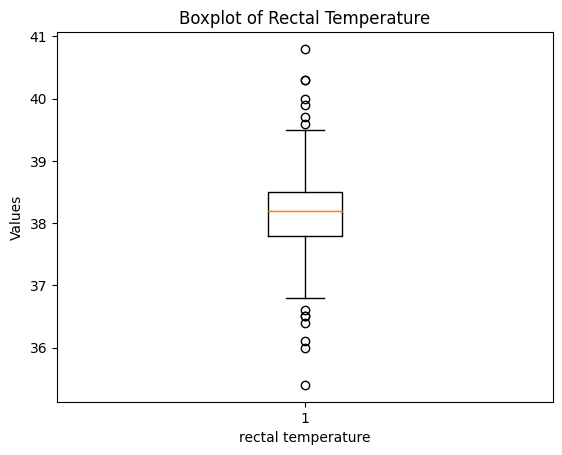

In [ ]:
import matplotlib.pyplot as plt
# Построение боксплота для столбца 'rectal temperature'
plt.boxplot(new_data_fill_mode['rectal temperature'])
plt.xlabel('rectal temperature')
plt.ylabel('Values')
plt.title('Boxplot of Rectal Temperature')
plt.show()

Среднее значение близко к медианному значению, что указывает на небольшую асимметрию в распределении.

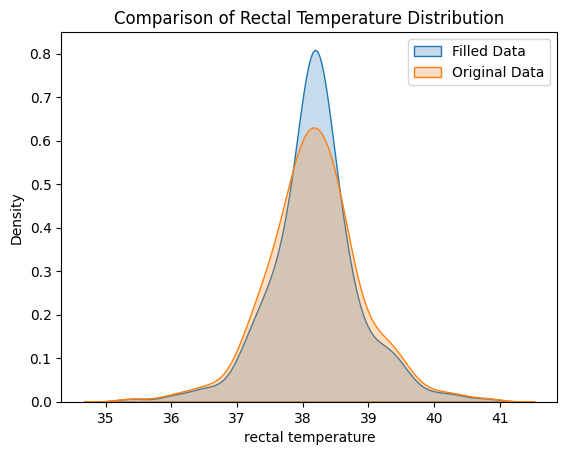

In [ ]:
import seaborn as sns

# Создание графика плотности распределения для 'rectal temperature'
sns.kdeplot(new_data_fill_mode['rectal temperature'], fill=True, label='Filled Data')
# Наложение исходных данных на график
sns.kdeplot(data['rectal temperature'], fill=True, label='Original Data')
plt.xlabel('rectal temperature')
plt.ylabel('Density')
plt.title('Comparison of Rectal Temperature Distribution')
plt.legend()
plt.show()

Заполнение пропущенных значений `rectal temperature` создало дополнительную группу значений рядом со средним значением, что привело к более сглаженной и широкой форме пика на графике.

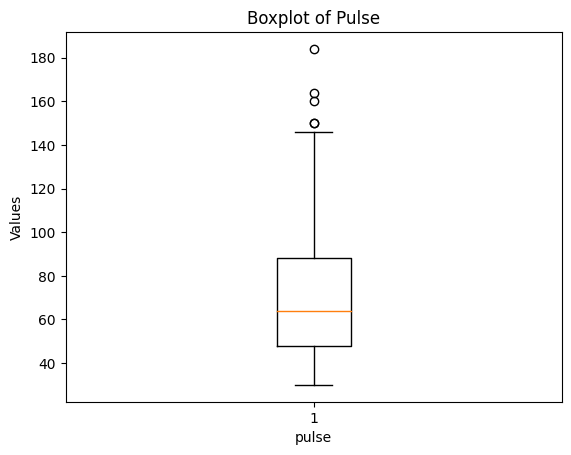

In [ ]:
# Построение боксплота для столбца 'pulse'
plt.boxplot(new_data_fill_mode['pulse'])
plt.xlabel('pulse')
plt.ylabel('Values')
plt.title('Boxplot of Pulse')
plt.show()

Hаспределение пульса скошено вправо (положительная асимметрия), так как медианное значение меньше среднего значения и максимальное значение находится далеко от среднего.

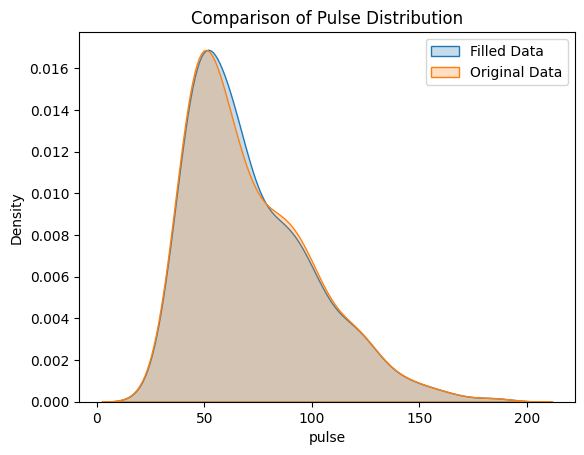

In [ ]:
# Создание графика плотности распределения для 'pulse'
sns.kdeplot(new_data_fill_mode['pulse'], fill=True, label='Filled Data')
# Наложение исходных данных на график
sns.kdeplot(data['pulse'], fill=True, label='Original Data')
plt.xlabel('pulse')
plt.ylabel('Density')
plt.title('Comparison of Pulse Distribution')
plt.legend()
plt.show()

Плотность распределения практически не изменилась

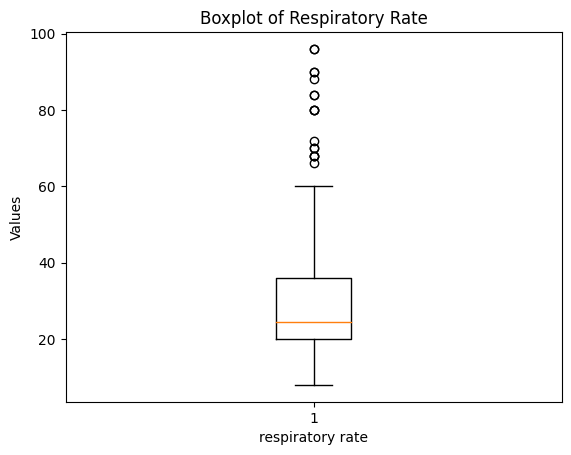

In [ ]:
# Построение боксплота для столбца 'respiratory rate'
plt.boxplot(new_data_fill_mode['respiratory rate'])
plt.xlabel('respiratory rate')
plt.ylabel('Values')
plt.title('Boxplot of Respiratory Rate')
plt.show()

Среднее значение далеко от медианного значению, что указывает на скошенность вправо (положительную асимметрию) в распределении.

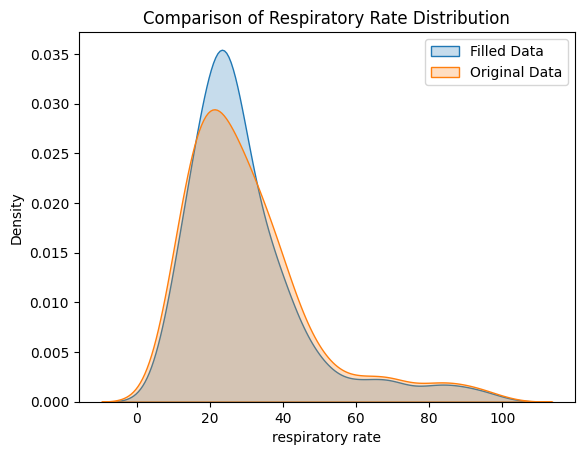

In [ ]:
# Создание графика плотности распределения для 'respiratory rate'
sns.kdeplot(new_data_fill_mode['respiratory rate'], fill=True, label='Filled Data')
# Наложение исходных данных на график
sns.kdeplot(data['respiratory rate'], fill=True, label='Original Data')
plt.xlabel('respiratory rate')
plt.ylabel('Density')
plt.title('Comparison of Respiratory Rate Distribution')
plt.legend()
plt.show()

Заполнение пропущенных значений `respiratory rate` создало дополнительную группу значений рядом со средним значением, что привело к более сглаженной и широкой форме пика на графике.